In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
df = pd.read_csv("data/fy24-capital-budget-plan-recommended.csv")

In [94]:
print(df.shape)

(433, 22)


In [95]:
df.columns

Index(['Department', 'Project_Name', 'Scope_Of_Work', 'PM_Department',
       'Project_Status', 'Neighborhood', 'Authorization_Existing',
       'Authorization_FY', 'Authorization_Future', ' Grant_Existing ',
       ' Grant_FY ', ' Grant_Future ', 'GO_Expended', 'Capital_Year_0',
       ' CapitalYear_1 ', 'Capital_Year_25', 'Grant_Expended', 'Grant_Year_0',
       ' Grant_Year_1 ', 'GrantYear_25', 'External_Funds',
       'Total_Project_Budget'],
      dtype='object')

In [96]:
df = df.drop_duplicates()

In [97]:
df.fillna(0, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Department              433 non-null    object
 1   Project_Name            433 non-null    object
 2   Scope_Of_Work           433 non-null    object
 3   PM_Department           433 non-null    object
 4   Project_Status          433 non-null    object
 5   Neighborhood            433 non-null    object
 6   Authorization_Existing  433 non-null    int64 
 7   Authorization_FY        433 non-null    int64 
 8   Authorization_Future    433 non-null    int64 
 9    Grant_Existing         433 non-null    int64 
 10   Grant_FY               433 non-null    int64 
 11   Grant_Future           433 non-null    int64 
 12  GO_Expended             433 non-null    int64 
 13  Capital_Year_0          433 non-null    int64 
 14   CapitalYear_1          433 non-null    int64 
 15  Capita

In [99]:
df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'], errors='coerce')
# Handling any new missing values after conversion
df['Total_Project_Budget'].fillna(df['Total_Project_Budget'].median(), inplace=True)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#encoding categories into numericla values
#df['Department'] = le.fit_transform(df['Department'])

#for text data processing, if needed, for example, making all text lowercase, removing punctuation, etc.
df['Scope_Of_Work'] = df['Scope_Of_Work'].str.lower().str.replace('[^\w\s]', '')

# Further steps such as handling outliers, feature engineering, etc., can be added as needed.

# Check the DataFrame after cleaning
print(df.head())

                              Department  \
0  Boston Centers for Youth and Families   
1  Boston Centers for Youth and Families   
2  Boston Centers for Youth and Families   
3  Boston Centers for Youth and Families   
4  Boston Centers for Youth and Families   

                                 Project_Name  \
0       BCYF Security and Technology Upgrades   
1  BCYF Tobin Community Center Retaining Wall   
2             BCYF North End Community Center   
3                                Pool Repairs   
4                        Youth Budget Round 4   

                                       Scope_Of_Work  \
0  improvements to technology infrastructure and ...   
1  repair or replace the retaining wall adjacent ...   
2  develop a design for a new north end community...   
3  renovate and upgrade locker rooms and pools in...   
4  engage youth across the city to create a capit...   

                           PM_Department           Project_Status  \
0  Boston Centers for Youth and Fa

In [101]:
df.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000.0
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000.0
2,Boston Centers for Youth and Families,BCYF North End Community Center,develop a design for a new north end community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000.0
3,Boston Centers for Youth and Families,Pool Repairs,renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000.0
4,Boston Centers for Youth and Families,Youth Budget Round 4,engage youth across the city to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000.0


In [102]:
print(len(df.PM_Department.value_counts()))
print(len(df.Scope_Of_Work.value_counts()))
print(len(df.Project_Name.value_counts()))
print(len(df.Department.value_counts()))
print(len(df.Neighborhood.value_counts()))

20
413
433
17
24


In [103]:
aggregation_functions = {'Total_Project_Budget': 'sum'}
df_new = df.groupby(df['Department']).aggregate(aggregation_functions)
df_new.head()

,Total_Project_Budget
Department,
Boston Centers for Youth and Families,203475000.0
Boston Planning and Development Agency,35125000.0
Boston Public Library,154290000.0
Boston Public Schools,904255151.0
Department of Innovation and Technology,83686892.0


C:\Users\wasup\AppData\Local\Temp\ipykernel_20520\4019717104.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted(department_budget))


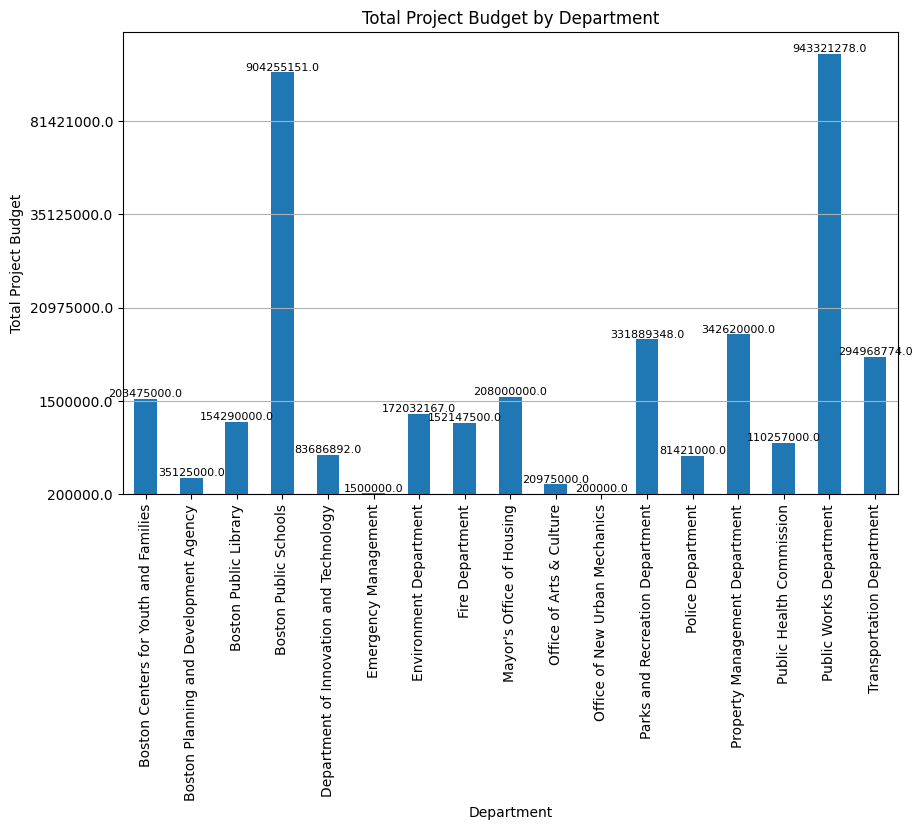

In [104]:
import matplotlib.pyplot as plt

department_budget = df_new.groupby('Department')['Total_Project_Budget'].sum()

plt.figure(figsize=(10, 6))
ax = department_budget.plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Total Project Budget')
plt.title('Total Project Budget by Department')
plt.grid(axis='y')

ax.set_yticklabels(sorted(department_budget))

for i, v in enumerate(department_budget):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

plt.show()


In [105]:
aggregation_functions = {'Total_Project_Budget': 'sum'}
df_N = df.groupby(df['Neighborhood']).aggregate(aggregation_functions)
df_N.head()

,Total_Project_Budget
Neighborhood,
Allston/Brighton,57605000.0
Back Bay,65442299.0
Bay Village,1525000.0
Beacon Hill,34410000.0
Charlestown,531212390.0


C:\Users\wasup\AppData\Local\Temp\ipykernel_20520\2453344493.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted(department_budget))


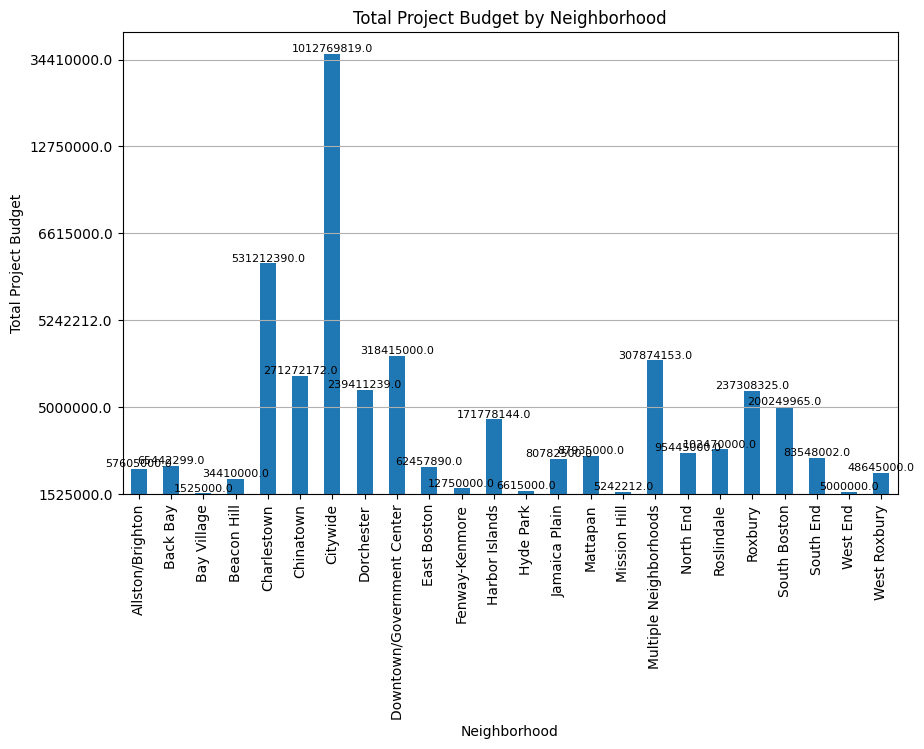

In [106]:
department_budget = df_N.groupby('Neighborhood')['Total_Project_Budget'].sum()

plt.figure(figsize=(10, 6))  
ax = department_budget.plot(kind='bar')

plt.xlabel('Neighborhood')
plt.ylabel('Total Project Budget')
plt.title('Total Project Budget by Neighborhood')
plt.grid(axis='y')

ax.set_yticklabels(sorted(department_budget))

for i, v in enumerate(department_budget):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

plt.show()


C:\Users\wasup\AppData\Local\Temp\ipykernel_20520\3613966372.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted(department_budget))


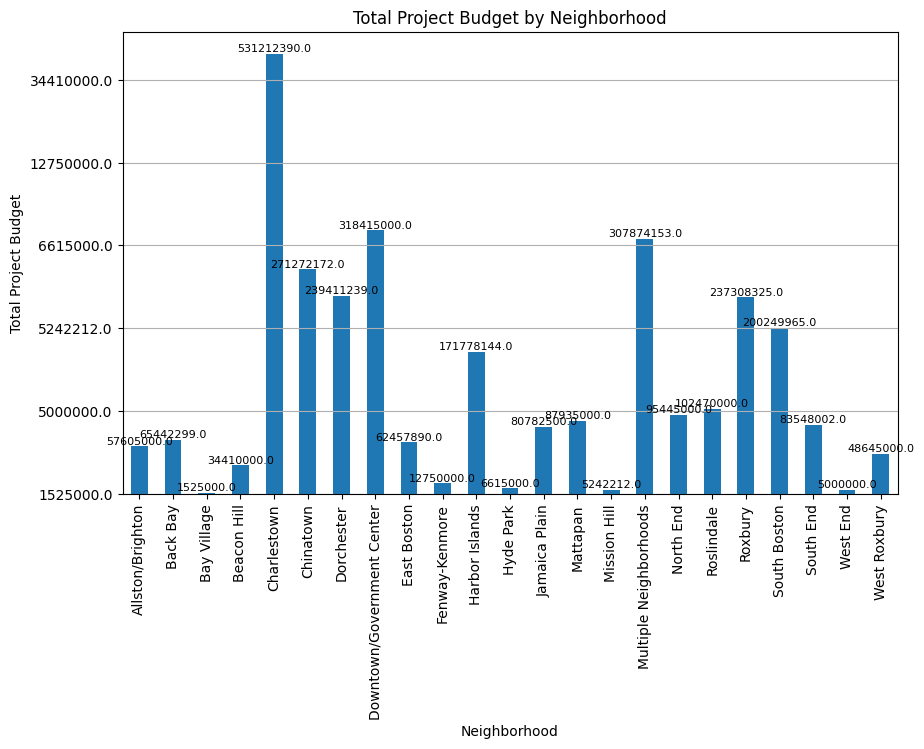

In [109]:
# Assuming your DataFrame is named 'df' and the column name is 'column_name'
value_to_delete = 'Citywide'

# Create a boolean mask to select rows that don't have the specific value
mask = df['Neighborhood'] != value_to_delete

# Use the mask to filter the DataFrame and keep only the rows you want
df = df[mask]

aggregation_functions = {'Total_Project_Budget': 'sum'}
df_a = df.groupby(df['Neighborhood']).aggregate(aggregation_functions)

department_budget = df_a.groupby('Neighborhood')['Total_Project_Budget'].sum()

plt.figure(figsize=(10, 6))  
ax = department_budget.plot(kind='bar')

plt.xlabel('Neighborhood')
plt.ylabel('Total Project Budget')
plt.title('Total Project Budget by Neighborhood')
plt.grid(axis='y')

ax.set_yticklabels(sorted(department_budget))

for i, v in enumerate(department_budget):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

plt.show()